In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

S:\AnacodaPy\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Import csv
car_details = pd.read_csv('C:/Users/91779/Desktop/CarPrice_Assignment.csv')

In [3]:
#Analyzing data
car_details.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#Analyzing data
car_details.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
#Analyzing data
car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

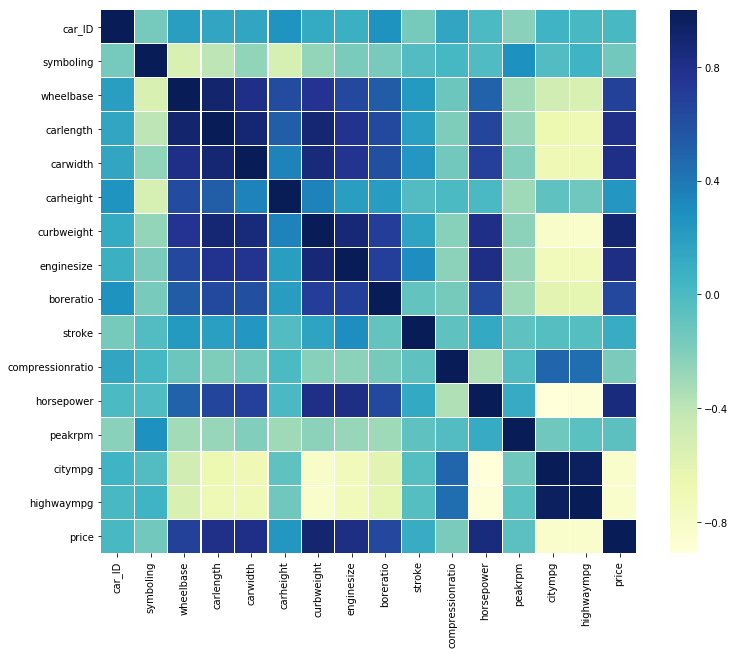

In [6]:
# co-relation between different parameters
corMat = car_details.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corMat, ax=ax, cmap="YlGnBu", linewidths=0.1)

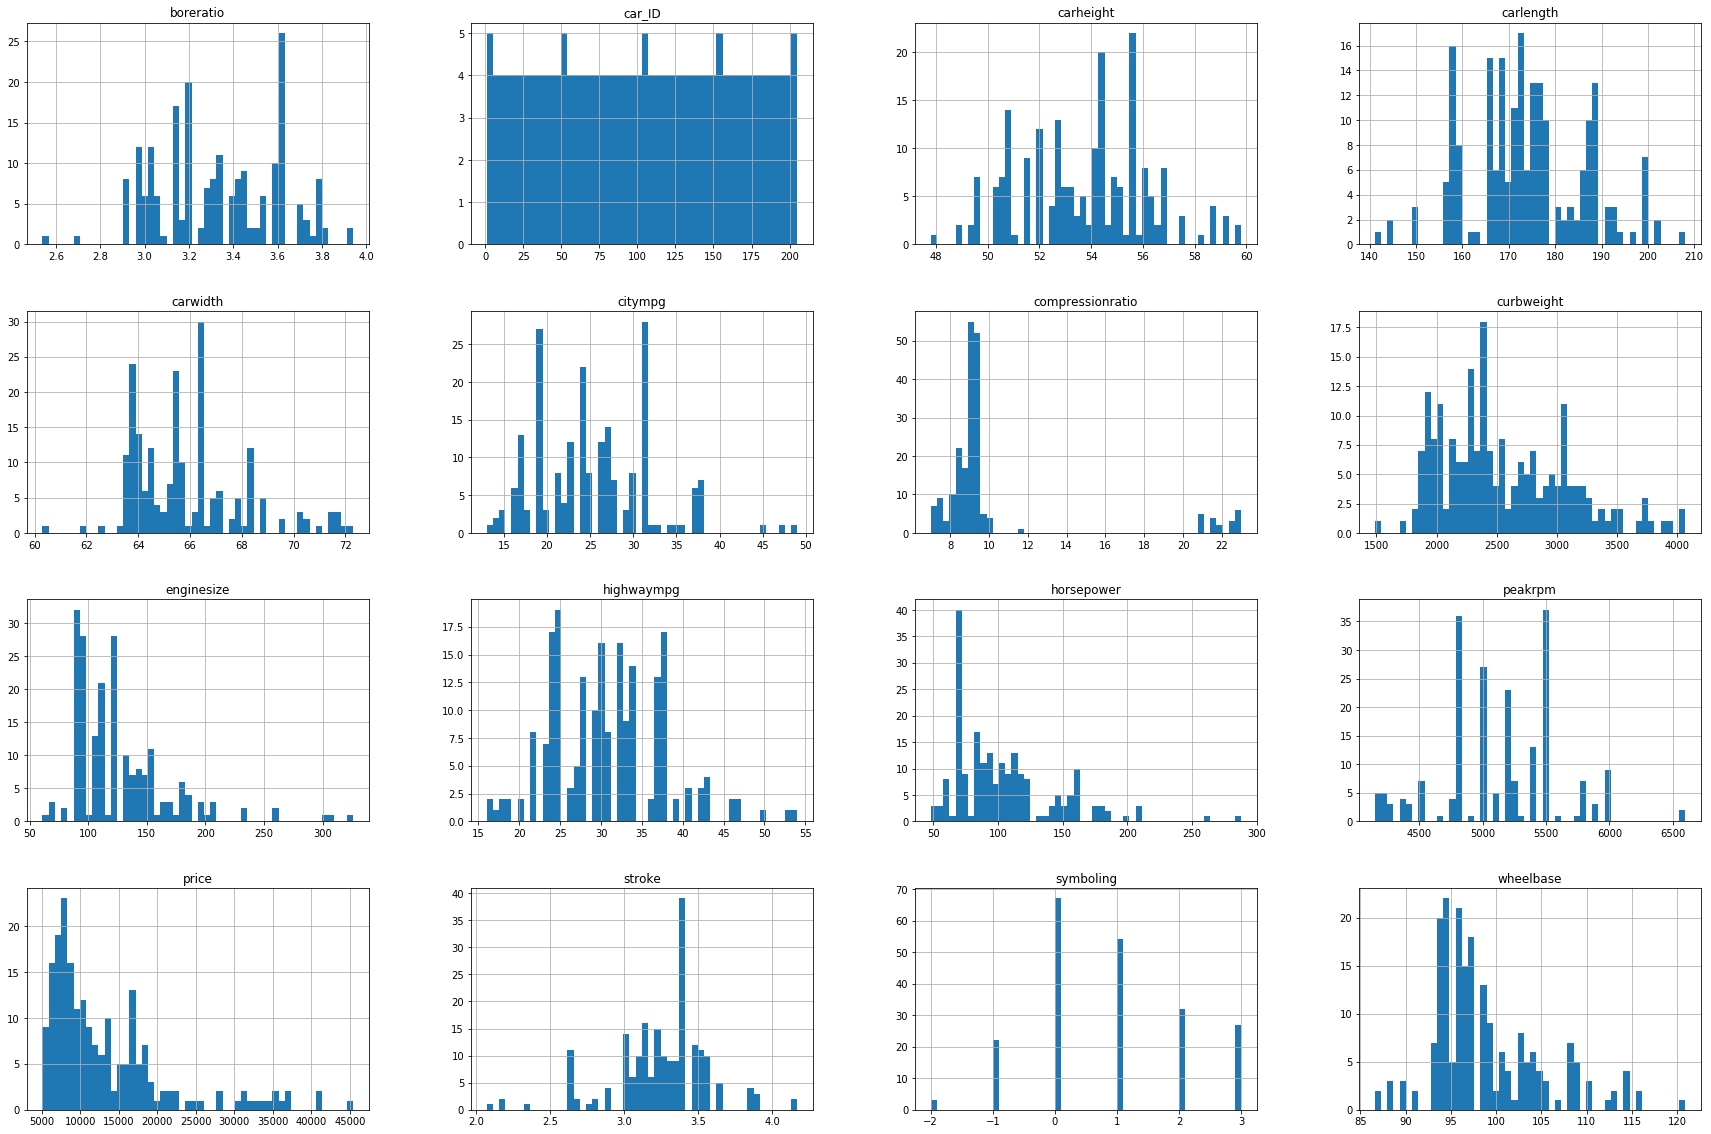

In [7]:
#uni-variate analysis
car_details.hist(bins=50, figsize=(30,20));

In [8]:
#cleaning data
car_details.drop(['car_ID','wheelbase','carwidth','curbweight','highwaympg'], axis =1, inplace = True)

In [9]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
carlength           205 non-null float64
carheight           205 non-null float64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
price               205 non-null float64
dtypes: float64(6), int64(5), object(10)
memory usage:

In [10]:
car_details["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [11]:
car_details["CarName"] = car_details["CarName"].str.replace('-', ' ')
car_details["CarName"].unique()

array(['alfa romero giulia', 'alfa romero stelvio',
       'alfa romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU X', 'isuzu D Max ',
       'isuzu D Max V Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx 4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx 7 gs',
       'mazda glc 

In [12]:
car_details['CarName'] = car_details['CarName'].str.lower()
car_details['CarName'] = car_details['CarName'].str.replace('vw','volkswagen')
car_details['CarName'] = car_details['CarName'].str.replace('vokswagen','volkswagen')
car_details['CarName'] = car_details['CarName'].str.replace('toyouta','toyota')
car_details['CarName'] = car_details['CarName'].str.replace('porcshce','porsche')
car_details['CarName'] = car_details['CarName'].str.replace('maxda','mazda')
car_details['CarName'] = car_details['CarName'].str.replace('maxda','mazda')
car_details['CarName'].unique()

array(['alfa romero giulia', 'alfa romero stelvio',
       'alfa romero quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu mu x', 'isuzu d max ',
       'isuzu d max v cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'mazda rx3', 'mazda glc deluxe', 'mazda rx2 coupe', 'mazda rx 4',
       'mazda 626', 'mazda glc', 'mazda rx 7 gs', 'mazda glc 4',
       'mazda glc custo

In [13]:
car_details["CarName"] = car_details["CarName"].map(lambda x: x.split(" ", 1)[0])
car_details["CarName"].unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [14]:
# creating dummy variables
car_details['fueltype'] = car_details['fueltype'].map({'gas': 1, 'diesel': 0})
car_details['aspiration'] = car_details['aspiration'].map({'std': 1, 'turbo': 0})
car_details['doornumber'] = car_details['doornumber'].map({'two': 1, 'four': 0})
car_details['enginelocation'] = car_details['enginelocation'].map({'front': 1, 'rear': 0})

In [15]:
car_details.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.902439,0.819512,0.439024,0.985366,174.049268,53.724878,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,13276.710571
std,1.245307,0.297446,0.385535,0.497483,0.120377,12.337289,2.443522,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,7988.852332
min,-2.000000,0.000000,0.000000,0.000000,0.000000,141.100000,47.800000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,5118.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,166.300000,52.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,7788.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,173.200000,54.100000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,10295.000000
75%,2.000000,1.000000,1.000000,1.000000,1.000000,183.100000,55.500000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,16503.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,208.100000,59.800000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,45400.000000


In [16]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null int64
carlength           205 non-null float64
carheight           205 non-null float64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
price               205 non-null float64
dtypes: float64(6), int64(9), object(6)
memory usage: 33.7

In [17]:
car_details.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,3,alfa,1,1,1,convertible,rwd,1,168.8,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0
1,3,alfa,1,1,1,convertible,rwd,1,168.8,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0
2,1,alfa,1,1,1,hatchback,rwd,1,171.2,52.4,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0
3,2,audi,1,1,0,sedan,fwd,1,176.6,54.3,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0
4,2,audi,1,1,0,sedan,4wd,1,176.6,54.3,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0


In [18]:
df = pd.get_dummies(car_details)
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,1,1,1,168.8,48.8,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,1,1,168.8,48.8,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,171.2,52.4,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,1,1,0,1,176.6,54.3,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,0,1,176.6,54.3,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [19]:
column_toBe_normalize = ['symboling', 'carlength', 'carheight', 
         'enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'price']
# Normalize numeric fields 
normalised_dataFrame = df[column_toBe_normalize].apply(lambda x: (x-np.mean(x))/ (max(x) - min(x)))

df['symboling'] = normalised_dataFrame['symboling']
df['carlength'] = normalised_dataFrame['carlength']
df['carheight'] = normalised_dataFrame['carheight']
df['enginesize'] = normalised_dataFrame['enginesize']
df['boreratio'] = normalised_dataFrame['boreratio']
df['stroke'] = normalised_dataFrame['stroke']
df['price'] = normalised_dataFrame['price']
df['compressionratio'] = normalised_dataFrame['compressionratio']
df['horsepower'] = normalised_dataFrame['horsepower']
df['peakrpm']= normalised_dataFrame['peakrpm']
df['citympg'] = normalised_dataFrame['citympg']

In [20]:
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.433171,1,1,1,1,-0.078347,-0.410407,0.011671,0.100174,-0.274007,...,0,0,0,0,0,0,0,1,0,0
1,0.433171,1,1,1,1,-0.078347,-0.410407,0.011671,0.100174,-0.274007,...,0,0,0,0,0,0,0,1,0,0
2,0.033171,1,1,1,1,-0.042526,-0.110407,0.094689,-0.464111,0.102184,...,0,0,0,0,0,0,0,1,0,0
3,0.233171,1,1,0,1,0.038071,0.047927,-0.067575,-0.099826,0.068850,...,0,0,0,0,0,0,0,1,0,0
4,0.233171,1,1,0,1,0.038071,0.047927,0.034312,-0.099826,0.068850,...,0,0,0,0,0,0,0,1,0,0


In [21]:
# initialize x with features
X = df[['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carlength', 'carheight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'CarName_alfa', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi']]

# initialize y with response
y = df['price']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [23]:
# Running RFE with 15 variables
lm = LinearRegression()
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)
print(rfe.ranking_)
print(rfe.support_)

[47 25  5 49 45  1 16  1  1  1 29 39  4 48 15  1  1  1 21 17 20 38 19 44
 50  6 32  2 14  1 30 10 33 46 31 11  9 36 35 37 42 41 43 40  8  1  3 13
 34  7  1  1 12  1 22  1  1  1 26 24 27 23 51 28 18 52]
[False False False False False  True False  True  True  True False False
 False False False  True  True  True False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False  True False False
 False False  True  True False  True False  True  True  True False False
 False False False False False False]


In [24]:
X_train.columns[rfe.support_]
columns = X_train.columns[~rfe.support_]
columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carheight', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'CarName_alfa', 'CarName_chevrolet', 'CarName_dodge', 'CarName_honda',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_renault', 'CarName_saab', 'CarName_subaru',
       'CarName_toyota', 'CarName_volkswagen', 'CarName_volvo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_six', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_s

In [25]:
X_train1 = X_train.drop(columns,1)
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.433171,1,1,1,1,-0.078347,-0.410407,0.011671,0.100174,-0.274007,...,0,0,0,0,0,0,0,1,0,0
1,0.433171,1,1,1,1,-0.078347,-0.410407,0.011671,0.100174,-0.274007,...,0,0,0,0,0,0,0,1,0,0
2,0.033171,1,1,1,1,-0.042526,-0.110407,0.094689,-0.464111,0.102184,...,0,0,0,0,0,0,0,1,0,0
3,0.233171,1,1,0,1,0.038071,0.047927,-0.067575,-0.099826,0.068850,...,0,0,0,0,0,0,0,1,0,0
4,0.233171,1,1,0,1,0.038071,0.047927,0.034312,-0.099826,0.068850,...,0,0,0,0,0,0,0,1,0,0


In [26]:
X_train1 = sm.add_constant(X_train1)
# Running the linear model
lm_1 = sm.OLS(y_train,X_train1).fit()

In [27]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Sun, 05 May 2019   Prob (F-statistic):           8.94e-61
Time:                        22:10:00   Log-Likelihood:                 206.99
No. Observations:                 143   AIC:                            -384.0
Df Residuals:                     128   BIC:                            -339.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [28]:
#check vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)
df.drop(columns, axis =1, inplace = True)
vif_cal(input_data=df, dependent_col="price")

S:\AnacodaPy\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
9,enginetype_rotor,inf
14,cylindernumber_two,inf
1,enginesize,7.110000
10,cylindernumber_eight,3.430000
0,carlength,3.000000
2,boreratio,2.470000
6,CarName_buick,2.210000
8,enginetype_dohcv,1.950000
7,CarName_porsche,1.790000
13,cylindernumber_twelve,1.750000


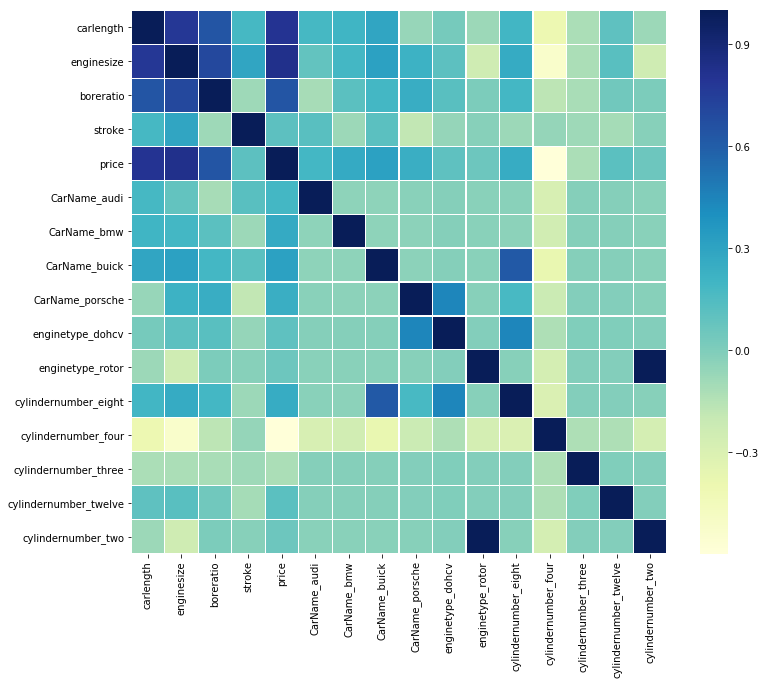

In [29]:
# co-relation between different parameters
corMat = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corMat, ax=ax, cmap="YlGnBu", linewidths=0.1)

In [30]:
#train and create model again
X_train2 = X_train1.drop('enginetype_rotor', 1)
lm_2 = sm.OLS(y_train,X_train2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Sun, 05 May 2019   Prob (F-statistic):           8.94e-61
Time:                        22:10:01   Log-Likelihood:                 206.99
No. Observations:                 143   AIC:                            -384.0
Df Residuals:                     128   BIC:                            -339.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [31]:
df.drop('enginetype_rotor', axis =1, inplace = True)
# Calculating Vif value
vif_cal(input_data= df, dependent_col="price")

,Var,Vif
1,enginesize,7.11
9,cylindernumber_eight,3.43
0,carlength,3.00
2,boreratio,2.47
6,CarName_buick,2.21
8,enginetype_dohcv,1.95
7,CarName_porsche,1.79
12,cylindernumber_twelve,1.75
3,stroke,1.50
10,cylindernumber_four,1.43


In [32]:
#train and create model again
X_train3 = X_train2.drop('cylindernumber_eight', 1)
lm_3 = sm.OLS(y_train,X_train3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     98.52
Date:                Sun, 05 May 2019   Prob (F-statistic):           2.50e-60
Time:                        22:10:01   Log-Likelihood:                 203.22
No. Observations:                 143   AIC:                            -378.4
Df Residuals:                     129   BIC:                            -337.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [33]:
df.drop('cylindernumber_eight', axis =1, inplace = True)
# Calculating Vif value
vif_cal(input_data=df, dependent_col="price")

,Var,Vif
1,enginesize,5.30
0,carlength,2.89
2,boreratio,2.35
7,CarName_porsche,1.70
6,CarName_buick,1.63
11,cylindernumber_twelve,1.55
9,cylindernumber_four,1.33
3,stroke,1.30
8,enginetype_dohcv,1.25
5,CarName_bmw,1.15


In [34]:
#train and create model again
X_train4 = X_train3.drop('enginetype_dohcv', 1)
lm_4 = sm.OLS(y_train,X_train4).fit()
print(lm_4.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     107.5
Date:                Sun, 05 May 2019   Prob (F-statistic):           2.37e-61
Time:                        22:10:01   Log-Likelihood:                 203.21
No. Observations:                 143   AIC:                            -380.4
Df Residuals:                     130   BIC:                            -341.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [35]:
df.drop('enginetype_dohcv', axis =1, inplace = True)
vif_cal(input_data=df, dependent_col="price")

,Var,Vif
1,enginesize,5.30
0,carlength,2.89
2,boreratio,2.34
6,CarName_buick,1.63
10,cylindernumber_twelve,1.55
7,CarName_porsche,1.45
8,cylindernumber_four,1.33
3,stroke,1.30
5,CarName_bmw,1.15
11,cylindernumber_two,1.15


In [36]:
X_train5 = X_train4.drop('cylindernumber_four', 1)
lm_5 = sm.OLS(y_train,X_train5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     112.8
Date:                Sun, 05 May 2019   Prob (F-statistic):           3.44e-61
Time:                        22:10:01   Log-Likelihood:                 200.15
No. Observations:                 143   AIC:                            -376.3
Df Residuals:                     131   BIC:                            -340.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.02

In [37]:
df.drop('cylindernumber_four', axis =1, inplace = True)
vif_cal(input_data=df, dependent_col="price")

,Var,Vif
1,enginesize,4.24
0,carlength,2.89
2,boreratio,2.25
6,CarName_buick,1.48
9,cylindernumber_twelve,1.43
7,CarName_porsche,1.41
3,stroke,1.26
4,CarName_audi,1.12
10,cylindernumber_two,1.12
5,CarName_bmw,1.10


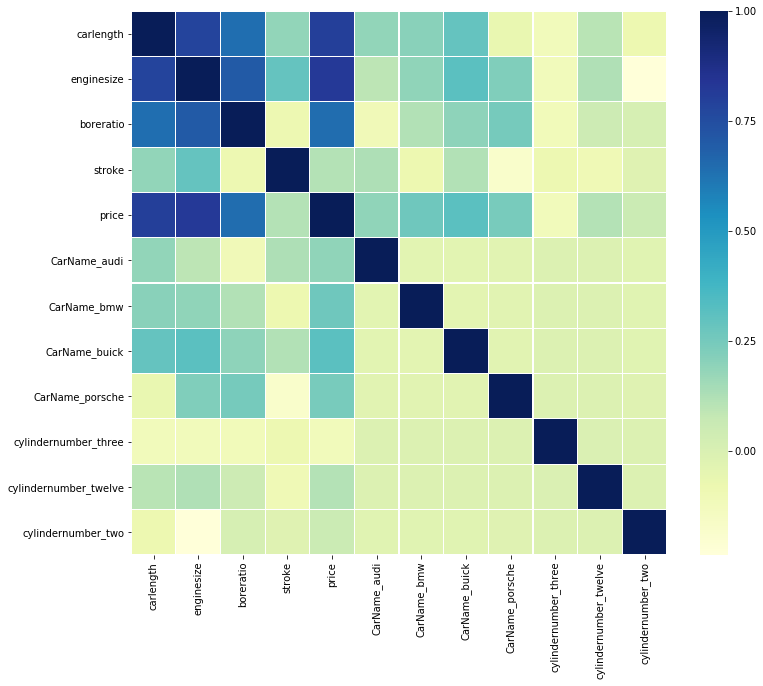

In [38]:
# co-relation between different parameters
corMat = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corMat, ax=ax, cmap="YlGnBu", linewidths=0.1)


In [39]:
X_train6 = X_train5.drop('cylindernumber_twelve', 1)
lm_6 = sm.OLS(y_train,X_train6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     122.8
Date:                Sun, 05 May 2019   Prob (F-statistic):           8.52e-62
Time:                        22:10:02   Log-Likelihood:                 199.01
No. Observations:                 143   AIC:                            -376.0
Df Residuals:                     132   BIC:                            -343.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0296 

In [40]:
df.drop('cylindernumber_twelve', axis =1, inplace = True)
vif_cal(input_data=df, dependent_col="price")

,Var,Vif
1,enginesize,3.05
0,carlength,2.81
2,boreratio,2.18
6,CarName_buick,1.37
7,CarName_porsche,1.35
3,stroke,1.15
4,CarName_audi,1.12
9,cylindernumber_two,1.08
5,CarName_bmw,1.07
8,cylindernumber_three,1.05


In [41]:
X_train7 = X_train6.drop('stroke', 1)
lm_7 = sm.OLS(y_train,X_train7).fit()
print(lm_7.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     135.5
Date:                Sun, 05 May 2019   Prob (F-statistic):           1.71e-62
Time:                        22:10:02   Log-Likelihood:                 198.05
No. Observations:                 143   AIC:                            -376.1
Df Residuals:                     133   BIC:                            -346.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0295 

In [42]:
df.drop('stroke', axis =1, inplace = True)
vif_cal(input_data=df, dependent_col="price")

,Var,Vif
1,enginesize,2.83
0,carlength,2.81
2,boreratio,2.11
5,CarName_buick,1.37
6,CarName_porsche,1.32
3,CarName_audi,1.12
8,cylindernumber_two,1.08
4,CarName_bmw,1.06
7,cylindernumber_three,1.04


In [43]:
X_train8 = X_train7.drop('boreratio', 1)
lm_8 = sm.OLS(y_train,X_train8).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     151.1
Date:                Sun, 05 May 2019   Prob (F-statistic):           3.47e-63
Time:                        22:10:02   Log-Likelihood:                 197.03
No. Observations:                 143   AIC:                            -376.1
Df Residuals:                     134   BIC:                            -349.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0290 

In [44]:
df.drop('boreratio', axis =1, inplace = True)
vif_cal(input_data=df, dependent_col="price")

,Var,Vif
1,enginesize,2.73
0,carlength,2.20
4,CarName_buick,1.35
5,CarName_porsche,1.18
3,CarName_bmw,1.06
7,cylindernumber_two,1.06
2,CarName_audi,1.04
6,cylindernumber_three,1.04


In [45]:
X_train9 = X_train8.drop('cylindernumber_three', 1)
lm_9 = sm.OLS(y_train,X_train9).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     169.3
Date:                Sun, 05 May 2019   Prob (F-statistic):           1.32e-63
Time:                        22:10:03   Log-Likelihood:                 195.27
No. Observations:                 143   AIC:                            -374.5
Df Residuals:                     135   BIC:                            -350.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0284      0

In [46]:
df.drop('cylindernumber_three', axis =1, inplace = True)
vif_cal(input_data=df, dependent_col="price")

,Var,Vif
1,enginesize,2.73
0,carlength,2.15
4,CarName_buick,1.34
5,CarName_porsche,1.18
3,CarName_bmw,1.06
6,cylindernumber_two,1.06
2,CarName_audi,1.04


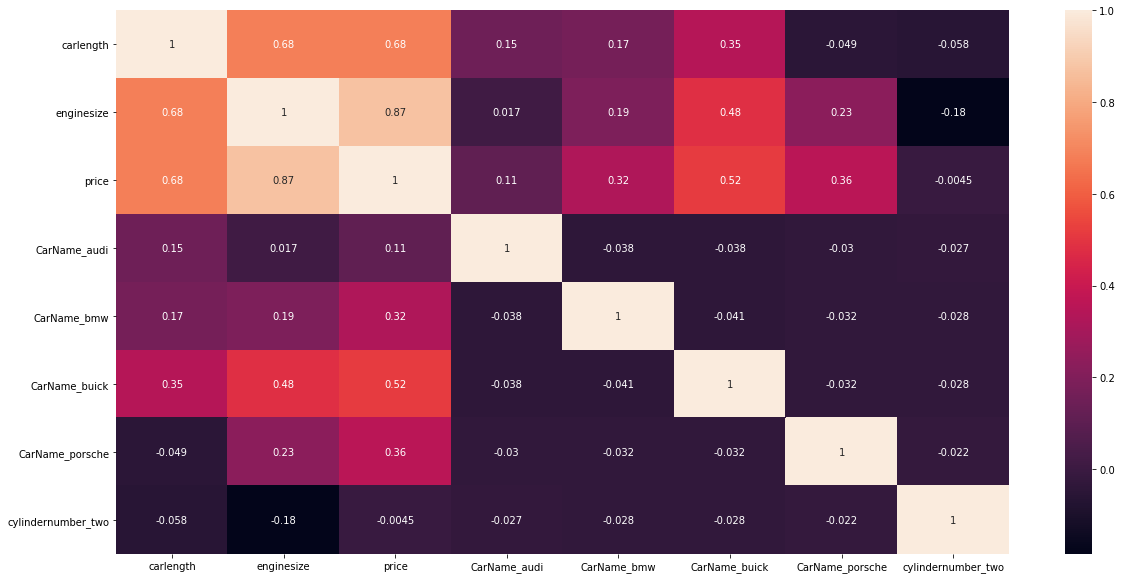

In [47]:
# co-relation between different parameters
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True)

In [48]:
# Add constant to test dataframe
X_test_m9 = sm.add_constant(X_test)
X_test_m9 = X_test_m9.drop(columns, axis=1)
X_test_m9 = X_test_m9.drop(['cylindernumber_three','enginetype_rotor','cylindernumber_eight',
                              'enginetype_dohcv','cylindernumber_four','cylindernumber_twelve','stroke','boreratio'], axis=1)
X_test_m9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 8 columns):
const                 62 non-null float64
carlength             62 non-null float64
enginesize            62 non-null float64
CarName_audi          62 non-null uint8
CarName_bmw           62 non-null uint8
CarName_buick         62 non-null uint8
CarName_porsche       62 non-null uint8
cylindernumber_two    62 non-null uint8
dtypes: float64(3), uint8(5)
memory usage: 2.2 KB


In [49]:
y_pred = lm_9.predict(X_test_m9)

In [50]:
y_pred

160   -0.134153
186   -0.086880
59    -0.031819
165   -0.127273
140   -0.131046
64    -0.031819
198    0.022834
75     0.021928
172    0.032964
104    0.118363
200    0.054629
136   -0.009486
111   -0.012089
41    -0.073384
73     0.782494
31    -0.213696
156   -0.134153
133   -0.009486
65     0.012182
83     0.053269
195    0.054629
197    0.054629
126    0.420286
118   -0.183074
167    0.032964
101    0.149894
124    0.053269
69     0.362145
11     0.135798
46    -0.055396
         ...   
110    0.115374
201    0.054629
115   -0.012089
174   -0.072810
134   -0.009486
169    0.032964
92    -0.139910
173   -0.038126
74     0.745421
3      0.035863
157   -0.134153
81    -0.045578
32    -0.235793
99    -0.050212
26    -0.183074
88    -0.081983
184   -0.121565
187   -0.121565
52    -0.175024
168    0.032964
164   -0.127273
188   -0.086880
7      0.160053
158   -0.099468
123   -0.040992
28    -0.040992
29     0.053269
182   -0.121565
40    -0.073384
128    0.420286
Length: 62, dtype: float

Text(0.5,0,'Index')

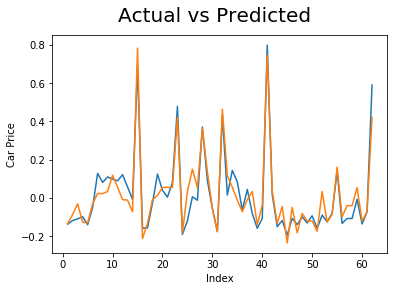

In [51]:
# Actual vs Predicted Graph
c = [index for index in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test)
plt.plot(c,y_pred)
fig.suptitle('Actual vs Predicted', fontsize=20)
plt.ylabel('Car Price')
plt.xlabel('Index')  

Text(0,0.5,'y_pred')

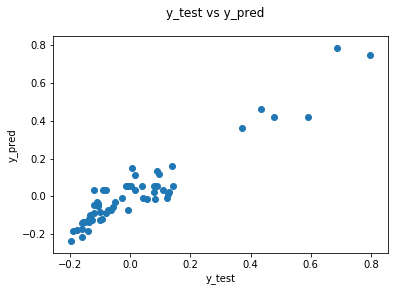

In [52]:
#Plot y_test and y_pred
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred') 
plt.xlabel('y_test')
plt.ylabel('y_pred')

Text(0,0.5,'ytest - ypred')

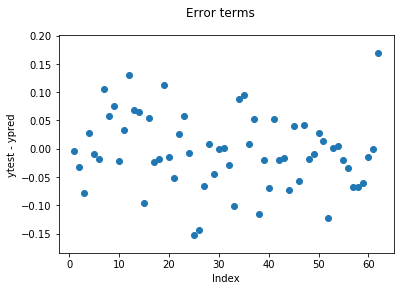

In [53]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.scatter(c,y_test-y_pred)
fig.suptitle('Error terms')
plt.xlabel('Index')
plt.ylabel('ytest - ypred')

S:\AnacodaPy\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'index')

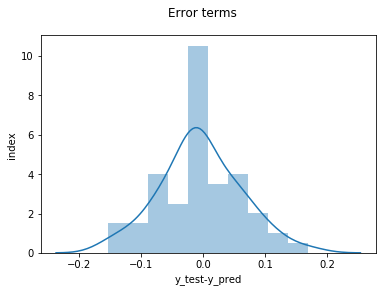

In [54]:
# Plot the error terms
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=10)
fig.suptitle('Error terms')
plt.xlabel('y_test-y_pred')
plt.ylabel('index')    

In [55]:
#calculate the R-squared score on the test set
r2_score(y_test, y_pred)

0.9015238942496355

In [56]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.06519190461262166


In [57]:
# The variables that can affect price are:

# 1 enginesize
# 2 carlength
# 3 CarName_buick
# 4 CarName_porsche 
# 5 CarName_bmw 
# 6 cylindernumber_two
# 7 CarName_audi